In [1]:
import pandas as pd
import numpy as np
import datetime
import os as os
import matplotlib.pyplot as plt

# Set so jupyter displays all columns
pd.set_option('display.max_columns', False)


In [2]:
os.chdir('../data/interim')

In [3]:
os.listdir()

['joined data post-markdowns.csv', 'joined data pre-markdowns.csv', '.gitkeep']

In [4]:
df1 = pd.read_csv('joined data pre-markdowns.csv')
df2 = pd.read_csv('joined data post-markdowns.csv')

In [5]:
df3 = df1.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [6]:
s1d1 = df3.loc[df3['Store'] == 1].loc[df3['Dept']==1]

In [7]:
s1d1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-01-10,20094.19,False,71.89,2.603,211.671989,7.838,A,151315
2935,1,1,2010-02-04,57258.43,False,62.27,2.719,210.820450,7.808,A,151315
5884,1,1,2010-02-07,16333.14,False,80.91,2.669,211.223533,7.787,A,151315
8801,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
11778,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315


In [8]:
s1d1 = s1d1.drop(['Store', 'Dept', 'Type', 'Size'], axis=1)

In [9]:
s1d1.set_index('Date', inplace=True)

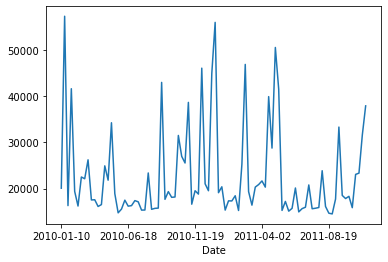

In [10]:
s1d1['Weekly_Sales'].plot()

In [56]:
df4 = df3.groupby(['Store', 'Date'])[['Weekly_Sales']].sum().sort_index()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12aa3daf0>,
      dtype=object)

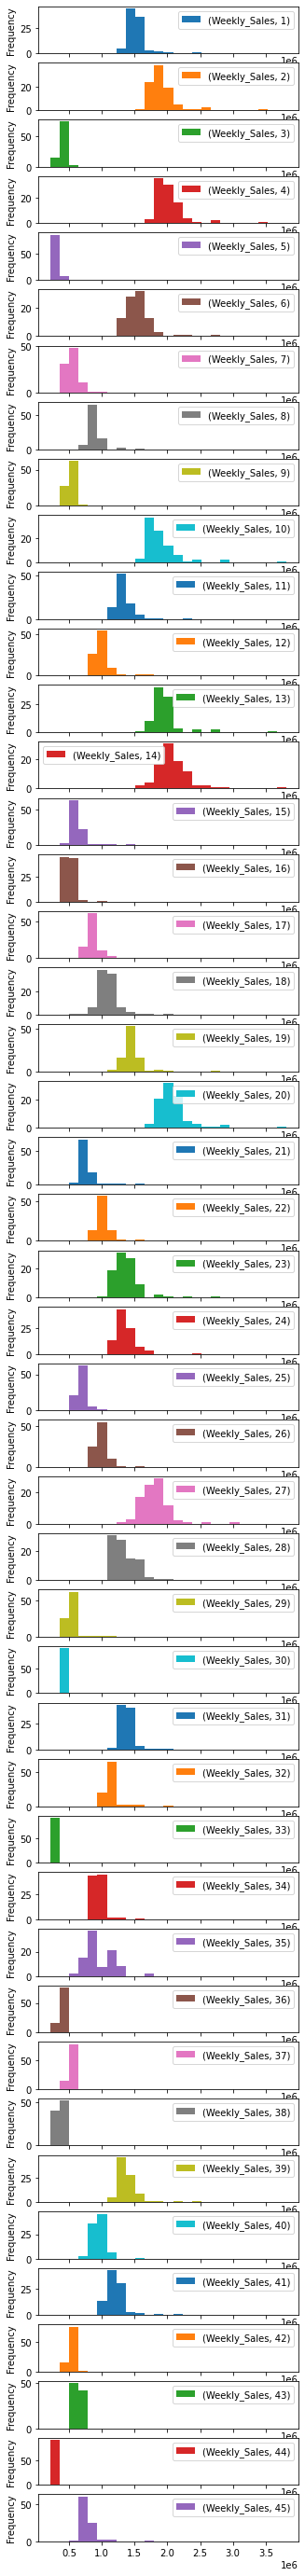

In [72]:
df4.unstack(level=0).plot(kind = 'hist', bins = 25, subplots = True, figsize = (5, 50))

In [73]:
df4.unstack(level=0)

Weekly_Sales                         ...                                 
Store                1           2          3   ...         43         44         45
Date                                            ...                                 
2010-01-10   1453329.50  1827440.43  358784.10  ...  657108.77  300152.45  690007.76
2010-02-04   1594968.28  2066187.72  423294.40  ...  650102.80  286197.50  877235.96
2010-02-07   1492418.14  2003940.64  381151.72  ...  667353.79  300628.19  800147.84
2010-02-19   1611968.17  2124451.54  421642.19  ...  658997.55  267956.30  841264.04
2010-02-26   1409727.59  1865097.27  407204.86  ...  618702.79  273079.07  741891.65
...                 ...         ...        ...  ...        ...        ...        ...
2011-10-06   1588948.32  1929153.16  391638.75  ...  643041.71  308770.42  814395.17
2011-10-14   1493525.93  1743882.19  368282.57  ...  590984.56  293031.78  720946.99
2011-10-21   1502562.78  1834680.25  394976.36  ...  594625.96  305969.81  771686.40
2011-10-28   1445249.09  1769296.25  389540.62  ...  572516.57  306336.07  781694.57
2011-11-02   1649614.93  2168041.61  430526.21  ...  635650.98  307486.73  766456.00

[92 rows x 45 columns]